In [8]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
track = "20240227-076-02"
graph_path = os.path.join(
    "..", "data", "datasets", "20250110", "graphs", f"{track}.json"
)

In [10]:
with open(graph_path, "r") as f:
    graph = nx.node_link_graph(json.load(f))

print(f"{len(graph.nodes())} nodes loaded")

6144 nodes loaded


In [11]:
# calculate average edge weight for each node
avg_weights = {}
for node in graph.nodes():
    weights = [graph[node][neighbor]["weight"] for neighbor in graph[node]]
    if weights:  # check if the node has any edges
        avg_weights[node] = sum(weights) / len(weights)
    else:
        avg_weights[node] = 0  # assign 0 for isolated nodes

color_values = [avg_weights[node] for node in list(graph.nodes())]

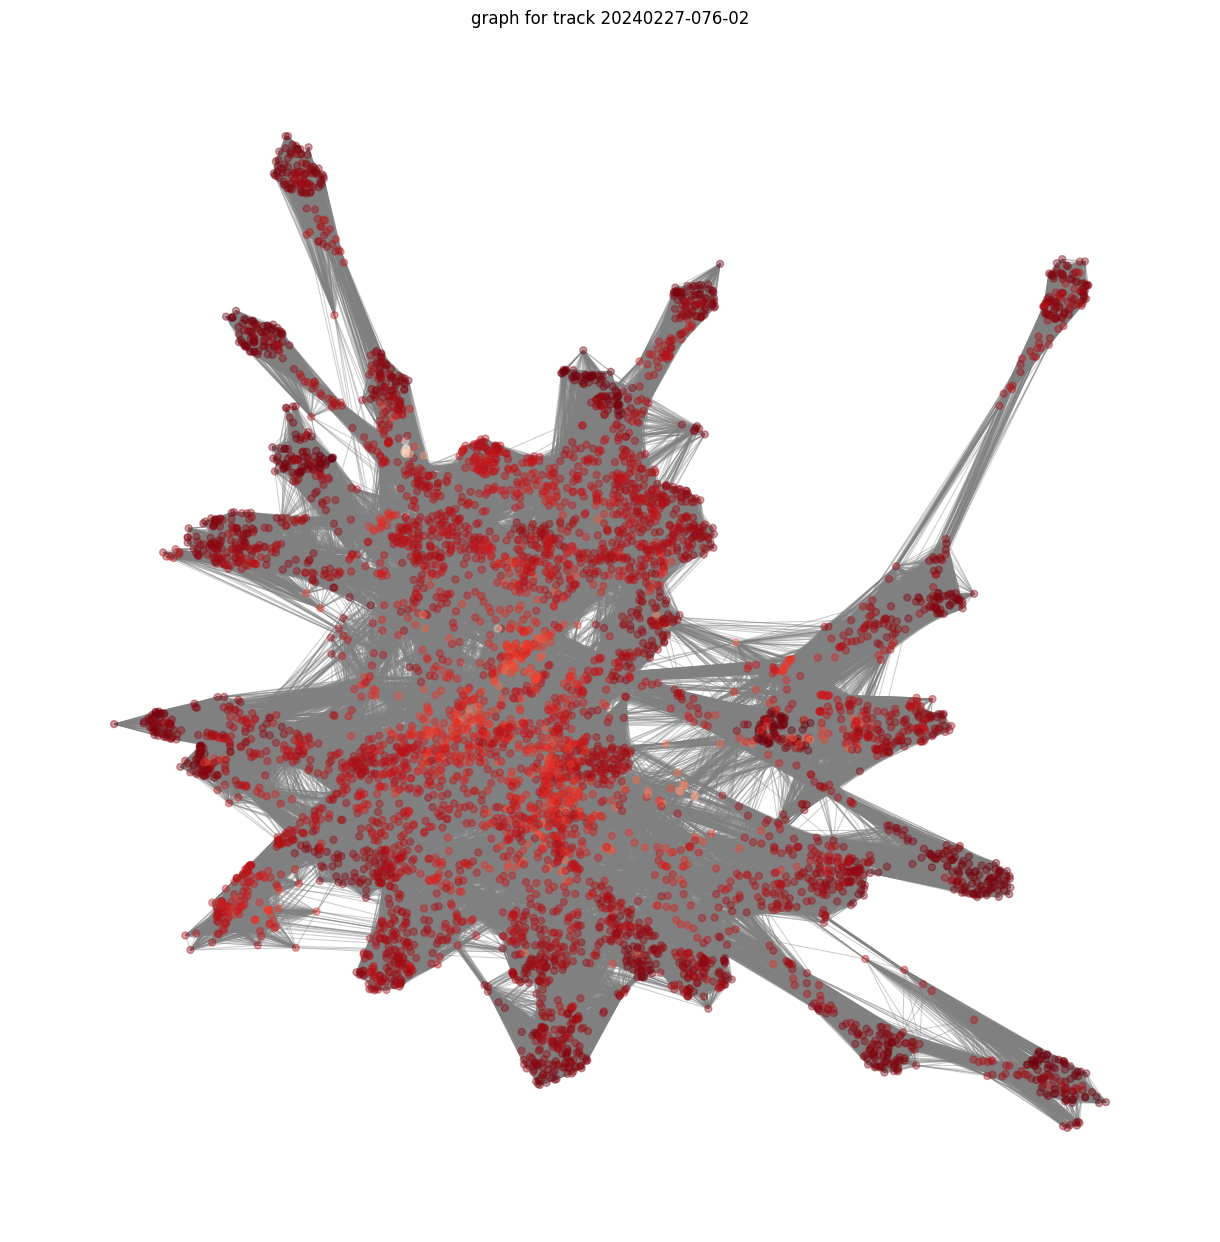

In [12]:
highlight_node = "20240227-076-02_0220-0227_t03s00"

# create a spring layout for the graph
pos = nx.spring_layout(graph, seed=0)

# draw the graph
plt.figure(figsize=(12, 12))
nx.draw(
    graph,
    pos,
    with_labels=False,
    node_color=list(avg_weights.values()),
    node_size=25,
    edge_color="gray",
    width=0.75,
    alpha=0.4,
    font_size=8,
    cmap=plt.cm.Reds_r,
)
plt.title("graph for track " + track)
plt.axis("off")
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

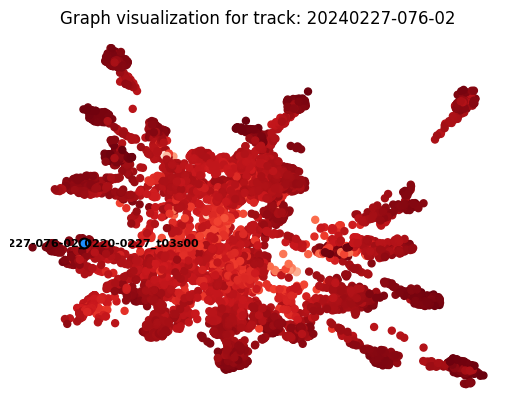

In [14]:
if highlight_node is not None and highlight_node in graph.nodes():
    # get all nodes except the highlighted one
    other_nodes = [n for n in list(graph.nodes()) if n != highlight_node]
    other_colors = [avg_weights[n] for n in other_nodes]

    # draw regular nodes
    nx.draw_networkx_nodes(
        graph,
        pos,
        nodelist=other_nodes,
        node_size=25,
        cmap="Reds_r",
        vmin=min(color_values),
        vmax=max(color_values),
        node_color=other_colors,
    )

    # draw and label the highlighted node
    nx.draw_networkx_nodes(
        graph,
        pos,
        nodelist=[highlight_node],
        node_size=50,
        node_color="dodgerblue",
        edgecolors="black",
        linewidths=1.5,
    )

    # add label for highlighted node
    nx.draw_networkx_labels(
        graph,
        pos,
        {highlight_node: highlight_node},
        font_size=8,
        font_weight="bold",
    )
else:
    # just draw all nodes colored by average weight
    nx.draw_networkx_nodes(
        graph, pos, node_size=25, cmap="Reds_r", node_color=color_values
    )

# add title, colorbar and adjust layout
plt.title(f"Graph visualization for track: {track}")
plt.axis("off")

# add colorbar for weight scale
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap("Reds_r"))
sm.set_array([])
plt.colorbar(sm, label="Average edge weight")

plt.tight_layout()
plt.show()